<a href="https://colab.research.google.com/github/ronil1508/SOC-2022_QML/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [41]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

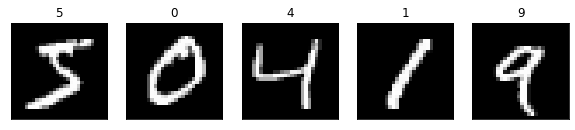

In [42]:
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [45]:
# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

In [44]:
# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

In [47]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [51]:
X_train = X_train/255
X_test = X_test/255

In [52]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2901 - acc: 0.9128 - val_loss: 0.1363 - val_acc: 0.9604
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1116 - acc: 0.9671 - val_loss: 0.1027 - val_acc: 0.9687
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - acc: 0.9782 - val_loss: 0.0828 - val_acc: 0.9727
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0550 - acc: 0.9837 - val_loss: 0.0760 - val_acc: 0.9767
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0423 - acc: 0.9874 - val_loss: 0.0761 - val_acc: 0.9782
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - acc: 0.9906 - val_loss: 0.0750 - val_acc: 0.9782
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0243 - acc: 0.9927 - val_loss: 0.0778 - val_acc: 0.9773
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

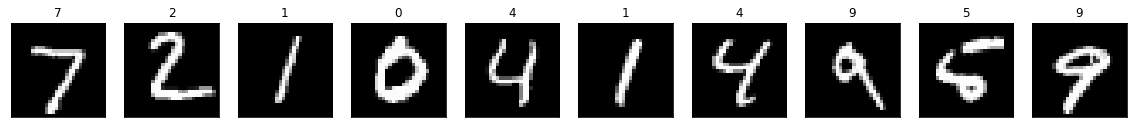

In [53]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()